<a href="https://www.kaggle.com/code/mikedelong/first-look-with-scatter-strip-and-clouds?scriptVersionId=145602312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv(filepath_or_buffer='/kaggle/input/inshorts-dataset-english/english_news_dataset.csv', parse_dates=['Date'], dayfirst=True)
df['category'] = df['News Categories'].apply(func=lambda x: '/'.join(literal_eval(x)))
df['headline length'] = df['Headline'].apply(func=lambda x: len(x.split()))
df['content length'] = df['Content'].apply(func=lambda x: len(x.split()))
df.head()

Headline  \
0  Congress leader Baljinder Singh shot dead at h...   
1  17-year-old girl preparing for NEET dies by su...   
2  Hampers to welcome MPs in new Parliament tomor...   
3  Only 10% women lawmakers in RS, while only 14%...   
4  Ganesh temple decorated with notes, coins wort...   

                                             Content News Categories  \
0  Congress leader Baljinder Singh was shot dead ...    ['national']   
1  Another NEET aspirant died by suicide in Rajas...    ['national']   
2  In order to mark the first-ever working day of...    ['national']   
3  Congress President Mallikarjun Kharge, while s...    ['national']   
4  The Sri Sathya Ganapathi Temple in Bengaluru a...    ['national']   

         Date  category  headline length  content length  
0  19-09-2023  national               11              60  
1  19-09-2023  national               11              59  
2  19-09-2023  national               10              60  
3  19-09-2023  national               13              60  
4  19-09-2023  national               11              56

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39458 entries, 0 to 39457
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Headline         39458 non-null  object
 1   Content          39458 non-null  object
 2   News Categories  39458 non-null  object
 3   Date             39458 non-null  object
 4   category         39458 non-null  object
 5   headline length  39458 non-null  int64 
 6   content length   39458 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [3]:
from plotly.express import strip
strip(data_frame=df, x='headline length', y='content length', color='category', hover_name ='Headline')

(-0.5, 1199.5, 1199.5, -0.5)

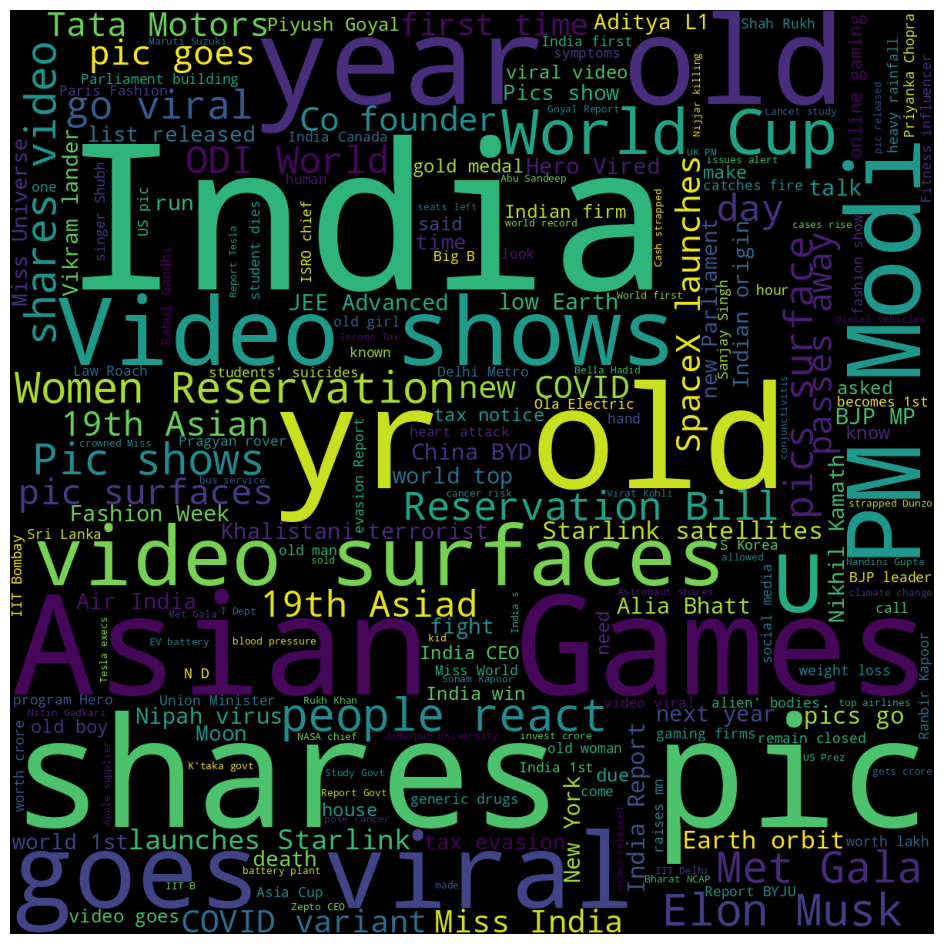

In [4]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['Headline'].values.tolist())), )
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

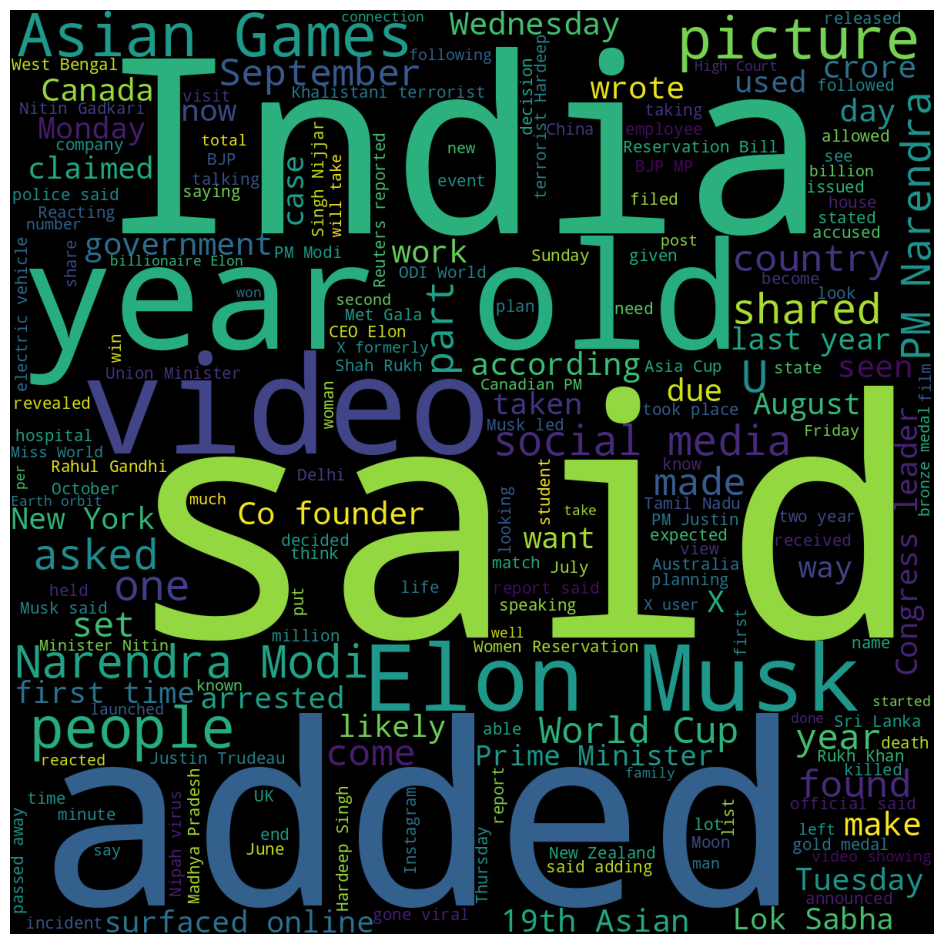

In [5]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['Content'].values.tolist())), )
axis('off')

In [6]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from plotly.express import scatter
def get_counts(column: str) -> pd.DataFrame:
    min_df = 10
    stop_words = list(STOPWORDS) + ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']
    count_vectorizer = CountVectorizer(stop_words=stop_words, min_df=min_df)
    tfidf = TfidfVectorizer(stop_words=stop_words, min_df=min_df)
    raw_documents = df[column].fillna('').values.tolist()
    raw_documents = [item for item in raw_documents if item != '']
    tfidf_result = tfidf.fit_transform(raw_documents=raw_documents)
    tfidf_df = pd.DataFrame(tfidf_result.toarray(), columns = tfidf.get_feature_names_out()).sum(axis=0).to_frame().reset_index().rename(columns={'index': 'token', 0 : 'tfidf'})
    count_result = count_vectorizer.fit_transform(raw_documents=raw_documents)
    count_df = pd.DataFrame(count_result.toarray(), columns =  count_vectorizer.get_feature_names_out()).sum(axis=0).to_frame().reset_index().rename(columns={'index': 'token', 0 : 'count'})
    return count_df.merge(right=tfidf_df, on='token', how='inner')

scatter(data_frame=get_counts(column='Headline'), x='count', y='tfidf', hover_name='token', log_x=True, log_y=True,
       title='Headline count/relevance plot').show()
scatter(data_frame=get_counts(column='Content'), x='count', y='tfidf', hover_name='token', log_x=True, log_y=True,
       title='Content count/relevancce plot').show()